In [54]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [10]:
# Functions that might be useful (please read the documentation)
# x.flatten() (take a N-dimensional numpy array and make it one-dimensional)
# numpy.random.choice -- choose from the list of images
# numpy.dot -- compute the dot product
# numpy.random.normal -- set up random initial weights

DIM = (28,28) #these are the dimensions of the image

def load_image_files(n, path="images/"):
    # helper file to help load the images
    # returns a list of numpy vectors
    images = []
    for f in os.listdir(os.path.join(path,str(n))): # read files in the path
        p = os.path.join(path,str(n),f)
        if os.path.isfile(p):
            i = np.loadtxt(p)
            assert i.shape == DIM # just check the dimensions here
            # i is loaded as a matrix, but we are going to flatten it into a single vector
            images.append(i.flatten())
    return images
            

# Load up these image files
A = load_image_files(0)
B = load_image_files(1)
C = load_image_files(2)


N = len(A[0]) # the total size
assert N == DIM[0]*DIM[1] # just check our sizes to be sure

In [11]:
import time

In [12]:
start = time.time()
D = load_image_files(3)
end = time.time()
E = load_image_files(4)
F = load_image_files(5)
print(end - start)

61.43414759635925


In [13]:
G = load_image_files(6)
H = load_image_files(7)
I = load_image_files(8)
J = load_image_files(9)

# Problem 1

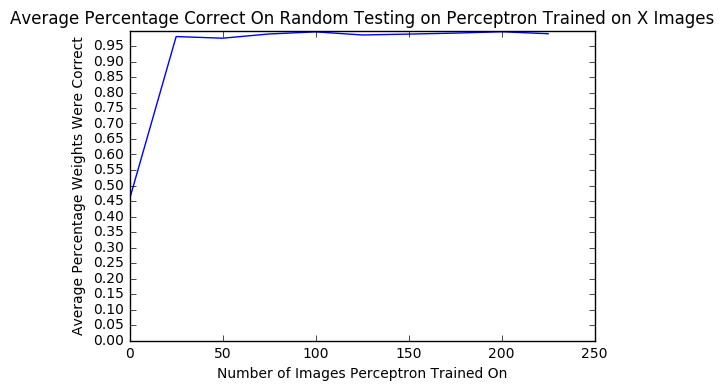

In [15]:
A_train, A_test = np.array_split(np.array(A), 2)
B_train, B_test = np.array_split(np.array(B), 2)

def unitstepfunc(num):
    #Converts number into 1 or 0, based on whether its positive or negative, respectively
    if num >= 0:
        return 1
    else:
        return 0
    

def perceptron(length):
    weights = np.random.normal(0,1,size=N)
    for i in range(length):
        choices = [A_train[np.random.randint(0, len(A_train))], B_train[np.random.randint(0, len(B_train))]]
        y = np.random.randint(0, 2)
        x = choices[y]
        summed = np.dot(x, weights)
        if summed >= 0 and y == 0:
            weights -= x
        if summed < 0  and y == 1:
            weights += x
    return weights

p = 0
accur = []
for r in range(10):
    accu = []
    weights = perceptron(p)
    for n in range(100):
        acc = 0
        for i in range(25):
            choices = [A_test[np.random.randint(0, len(A_test))],\
                       B_test[np.random.randint(0, len(B_test))]]
            y = np.random.randint(0, 2)
            x = choices[y]
            final = unitstepfunc(np.dot(weights, x))
            if final == y:
                acc+=1
        accu.append(acc/25)
    accur.append(np.average(accu))
    p += 25
    
plt.plot(np.arange(0, 250, 25), accur)
xs = np.arange(0, 1, 0.05)
plt.yticks(xs)
plt.title("Average Percentage Correct On Random Testing on Perceptron Trained on X Images")
plt.xlabel("Number of Images Perceptron Trained On")
plt.ylabel("Average Percentage Weights Were Correct")

# Problem 2

<b> According to this graph I made, the perceptron converges to 100 after being trained on only 25 images, which means the two numbers must be very starkly linearly seperable. </b>

# Problem 3

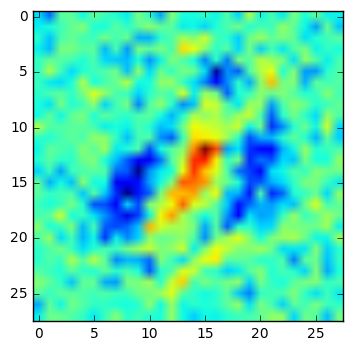

In [16]:
weight = perceptron(2500)
weight = np.reshape(weight, (28, 28))
plt.imshow(weight)

<b> This graph makes sense given what we're searching for, aka ones and zeros. The hottest point on this heatmap is the center, whilst the coolest parts are surrounding it in a zero shape. This ensures any pixels in the middle are maximized in their value (as ones are usually written centered on the page, and maximizing those pixel's value will give us an overall larger dot product (positive), which is correlated to ones), whilst potential zeros have their values minimized (for the inverse reason given for the ones). </b>

# Problem 4

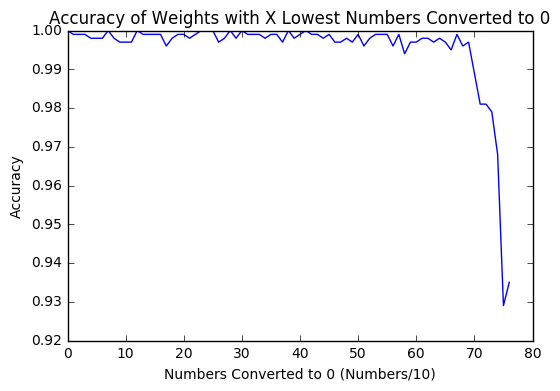

In [17]:
weight = perceptron(2500)
weights_zeroed = []
for i in np.arange(10, 780, 10):
    copy = weight.copy()
    indices = np.abs(weight).argsort()[:i]
    for n in indices:
        copy[n] = 0
    weights_zeroed.append(copy)

accu = []
for i in weights_zeroed:
    acc = 0
    for n in range(1000):
        choices = [A_test[np.random.randint(0, len(A_test))], \
                   B_test[np.random.randint(0, len(B_test))]]
        y = np.random.randint(0, 2)
        x = choices[y]
        final = unitstepfunc(np.dot(i, x))
        if final == y:
            acc+=1
    accu.append(acc/1000)
    
plt.plot(range(len(accu)), accu)
plt.title("Accuracy of Weights with X Lowest Numbers Converted to 0")
plt.ylabel("Accuracy")
plt.xlabel("Numbers Converted to 0 (Numbers/10)")

<b> This graph implies that the number of numbers in the weight vector that are integral to making an accurate prediction is relatively small (around 80 pixels). </b>

# Problem 5 CODE

In [44]:
import itertools
all_numbers = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
all_combos = []
for i in all_numbers:
    for n in all_numbers:
        all_combos.append((i, n))

def number_string_checker(string):
    if string == "A":
        return A
    elif string == "B":
        return B
    elif string == "C":
        return C
    elif string == "D":
        return D
    elif string == "E":
        return E
    elif string == "F":
        return F
    elif string == "G":
        return G
    elif string == "H":
        return H
    elif string == "I":
        return I
    elif string == "J":
        return J
    
def perceptron_general(length, first, second):
    weights = np.random.normal(0,1,size=N)
    for i in range(length):
        choices = [first[np.random.randint(0, len(first))], second[np.random.randint(0, len(second))]]
        y = np.random.randint(0, 2)
        x = choices[y]
        summed = np.dot(x, weights)
        if summed >= 0 and y == 0:
            weights -= x
        if summed < 0  and y == 1:
            weights += x
    return weights
    

def accuracy_check_general(weight, iterations, first, second):
    overall = []
    for n in range(200):
        acc = 0
        for n in range(iterations):
            choices = [first[np.random.randint(0, len(first))], second[np.random.randint(0, len(second))]]
            y = np.random.randint(0, 2)
            x = choices[y]
            final = unitstepfunc(np.dot(weight, x))
            if final == y:
                acc+=1
        overall.append(acc/iterations)
    return max(overall)

In [64]:
start = time.time()
overall_percentages = []
for i in all_combos:
    image1 = number_string_checker(i[0])
    image2 = number_string_checker(i[1])
    if i[0] == i[1]:
        overall_percentages.append(1)
        continue
    weights = perceptron_general(100, image1, image2)
    overall_percentages.append(\
            accuracy_check_general(weights, 500, image1, image2))
end = time.time()
print(end-start)

77.86174392700195


# Problem 5

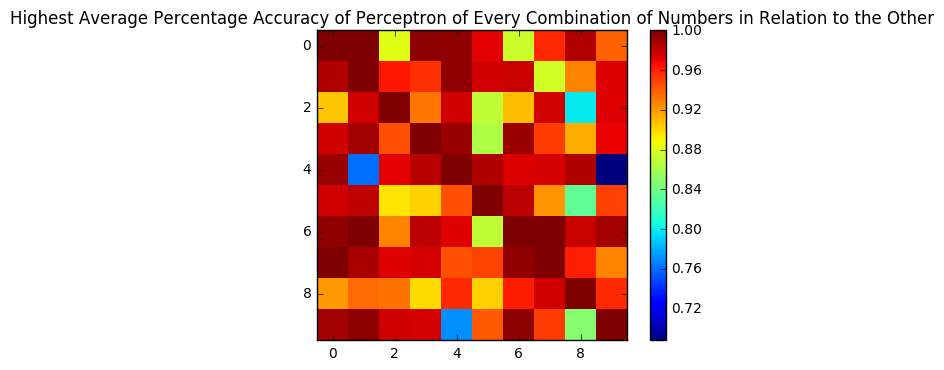

In [65]:
reshaped = np.reshape(overall_percentages, (10, 10))
plt.imshow(reshaped, interpolation="none")
plt.colorbar()
plt.title("Highest Average Percentage Accuracy of Perceptron of Every Combination of Numbers in Relation to the Other")

<b> Generally, based on the random nature of how the perceptron works, the randomness of the accuracies make sense. But whilst some pairs (like 2 and 4) make sense logically as to why they would have high accuracies or low accuracies (like 4 and 9), other pairs (like 3 and 5) have surprisingly low accuracies. </b>